In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


C:\Users\Nayamat\AppData\Local\Temp\ipykernel_28648\2710574447.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date)
[*********************100%***********************]  1 of 1 completed


Data fetched from 2015-07-09 to 2025-07-08
Price            Close
Ticker            AAPL
Date                  
2025-07-01  207.820007
2025-07-02  212.440002
2025-07-03  213.550003
2025-07-07  209.949997
2025-07-08  210.009995


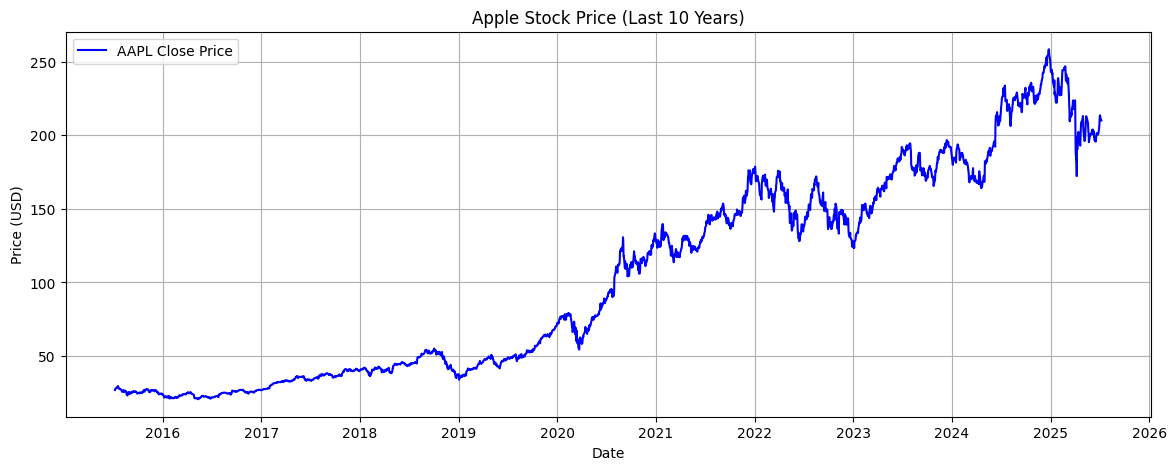

In [3]:
# Define the ticker and start date (10 years back)
from datetime import datetime
ticker = "AAPL"
start_date = (datetime.now() - pd.DateOffset(years=10)).strftime('%Y-%m-%d')

# Fetch data
data = yf.download(ticker, start=start_date)
data = data[['Close']]  # Keep only the 'Close' column
data.dropna(inplace=True)

# Show range and recent data
print(f"Data fetched from {start_date} to {data.index[-1].strftime('%Y-%m-%d')}")
print(data.tail())


plt.figure(figsize=(14, 5))
plt.plot(data['Close'], label='AAPL Close Price', color='blue')
plt.title('Apple Stock Price (Last 10 Years)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
print(data.isnull().sum())


Price  Ticker
Close  AAPL      0
dtype: int64


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])
scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=['Close'])
# print("Scaled data head:")
# print(scaled_data.head())

In [6]:
import numpy as np

X = []
y = []
sequence_length = 60

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data.iloc[i-sequence_length:i, 0].values)  # 60 days as input
    y.append(scaled_data.iloc[i, 0])                           # 61st day as label

X = np.array(X)
y = np.array(y)

# Reshape X for LSTM: (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (2454, 60, 1)
Shape of y: (2454,)


In [7]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
#we used 80% for training and 20% for testing


Training set shape: (1963, 60, 1) (1963,)
Testing set shape: (491, 60, 1) (491,)


In [9]:
#%pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

model = Sequential()

# First LSTM Layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM Layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=1))  # Predicting one value (next day price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Show summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
%pip install protobuf==3.20.3



  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
Note: you may need to restart the kernel to use updated packages.


Epoch 1/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - loss: 0.0172 - val_loss: 0.0021
Epoch 2/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 4/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 5/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 6/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 7/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 9.3949e-04 - val_loss: 9.5950e-04
Epoch 9/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0011 - val_loss: 9.2665e-04
Epoch 10/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 8.6496e-04 - val_loss: 0.0011
Epoch 11/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 9.8523e-04 - val_loss: 0.0032
Epoch 12/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 

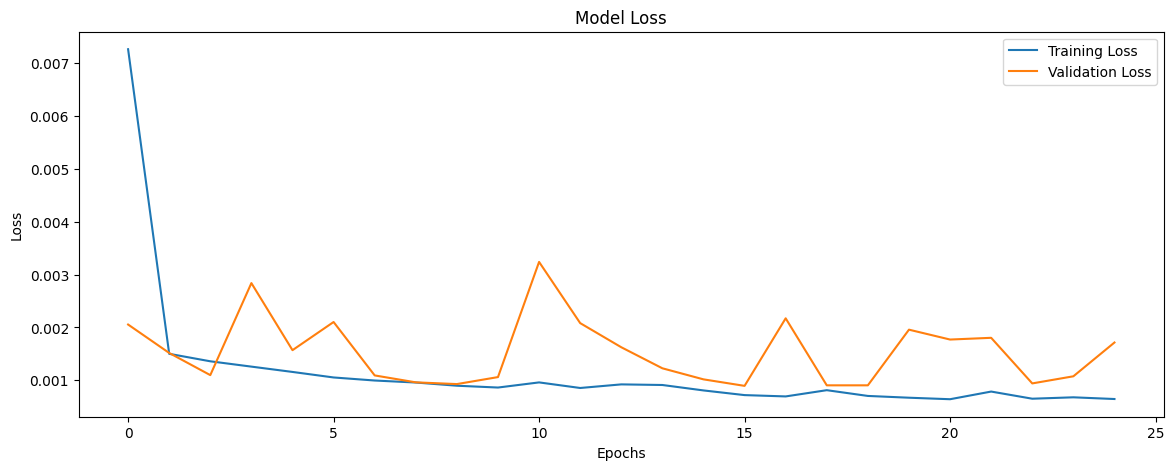

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test)
)
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


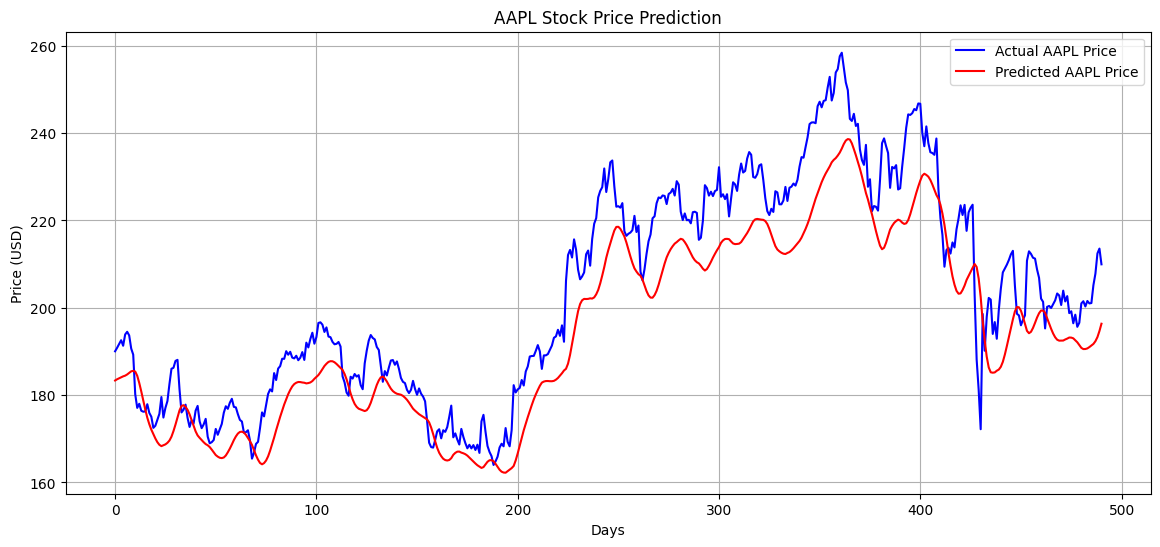

In [9]:
# Predict using the trained model
predicted_prices = model.predict(X_test)

# Invert scaling (from 0-1 back to real price)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(actual_prices, color='blue', label='Actual AAPL Price')
plt.plot(predicted_prices, color='red', label='Predicted AAPL Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
 Predicted closing price for the next day: $200.93


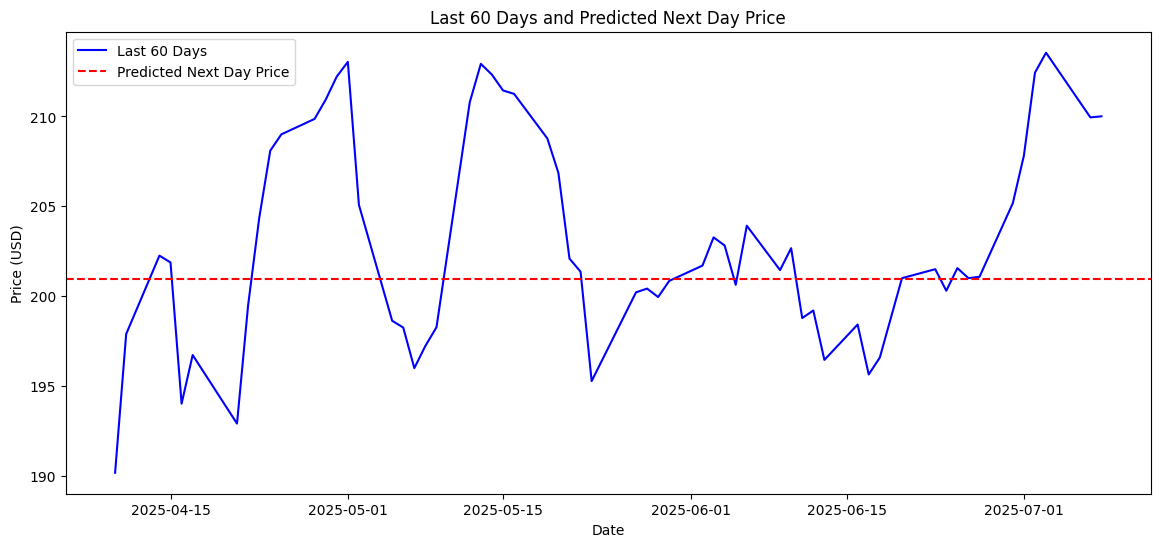

In [11]:
import numpy as np

# Step 1: Get the last 60 days from the original dataset
last_60_days = data[-60:].values  # shape = (60, 1)

# Step 2: Normalize using the same scaler used earlier
scaled_last_60 = scaler.transform(last_60_days)

# Step 3: Reshape to (1, 60, 1) to match LSTM input
X_future = np.reshape(scaled_last_60, (1, 60, 1))

# Step 4: Predict the next day's price
predicted_next_price = model.predict(X_future)

# Step 5: Inverse transform to get actual price
predicted_next_price_actual = scaler.inverse_transform(predicted_next_price)

print(f" Predicted closing price for the next day: ${predicted_next_price_actual[0][0]:.2f}")

# Step 6: Visualize the prediction
plt.figure(figsize=(14, 6))
plt.plot(data.index[-60:], last_60_days, label='Last 60 Days', color='blue')
plt.axhline(y=predicted_next_price_actual[0][0], color='red', linestyle='--', label='Predicted Next Day Price')
plt.title('Last 60 Days and Predicted Next Day Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()